<a href="https://colab.research.google.com/github/lohi629/Speech_Emotion_Recognition/blob/main/Speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading dataset

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download ejlok1/toronto-emotional-speech-set-tess

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip toronto-emotional-speech-set-tess

**Importing modules**

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

**load the dataset**

In [ ]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        #print(filename)
        label=filename.split("_")[-1]
        label=label.split(".")[0]
        labels.append(label.lower())
        break
print("dataset is loaded")

dataset is loaded


In [ ]:
paths[:5]

[]

In [ ]:
labels[:5]

['disgust', 'ps', 'disgust', 'fear', 'sad']

**Creating dataframe**

In [ ]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label


In [ ]:
df['label'].value_counts()

disgust    2
ps         2
fear       2
sad        2
neutral    2
happy      2
angry      2
Name: label, dtype: int64

**Exploratory DataAnalysis**

In [ ]:
sns.countplot(df['label'])

In [ ]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

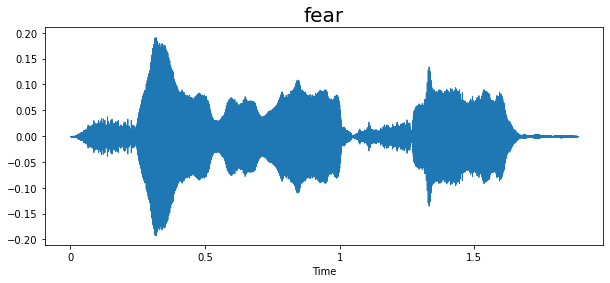

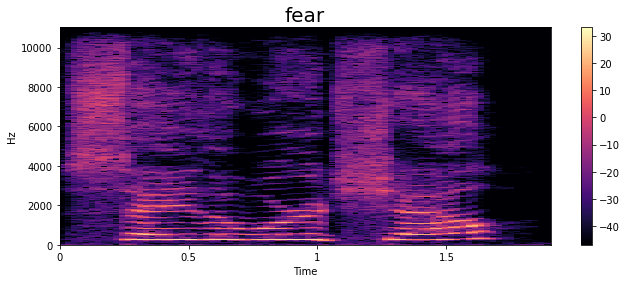

In [ ]:
emotion='fear'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

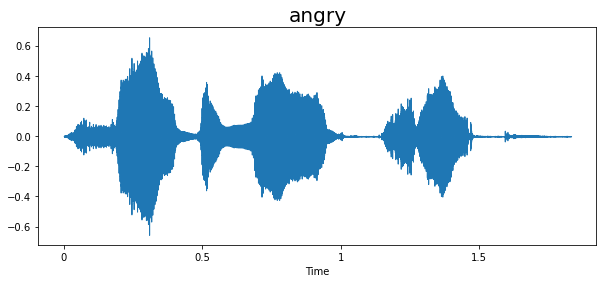

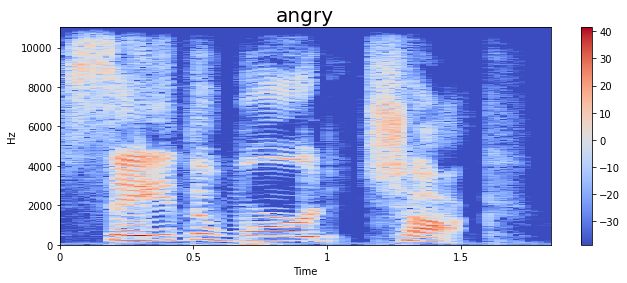

In [ ]:
emotion='angry'
path=np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


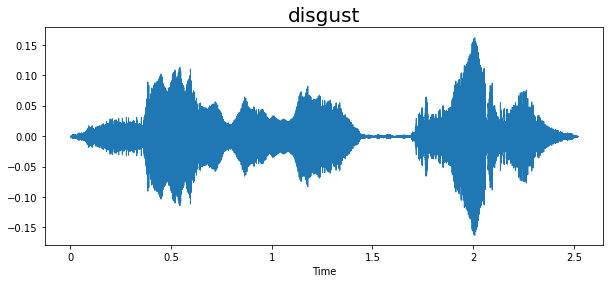

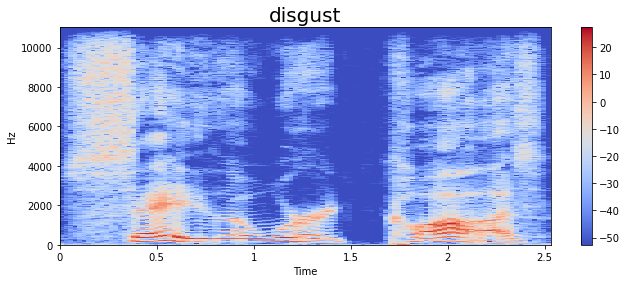

In [ ]:
emotion='disgust'
path=np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

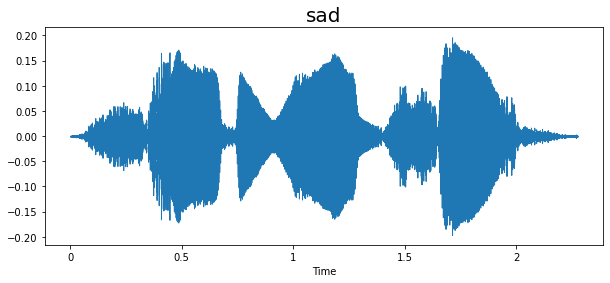

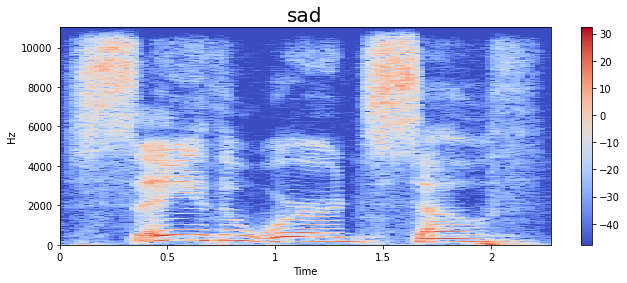

In [ ]:
emotion='sad'
path=np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

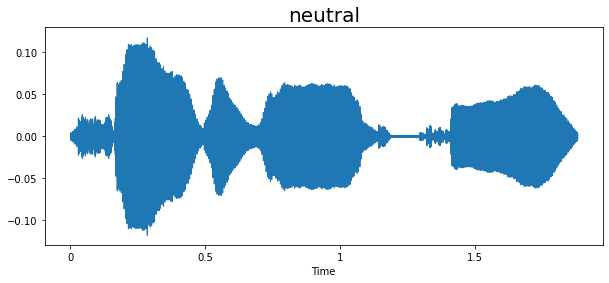

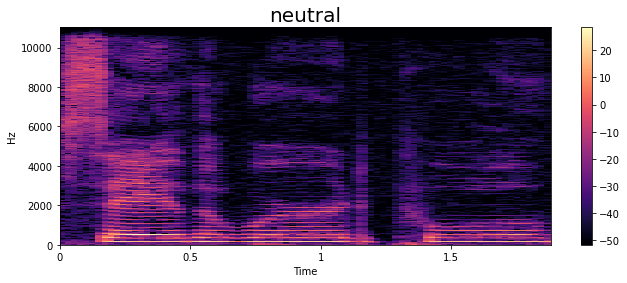

In [ ]:
emotion='neutral'
path=np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

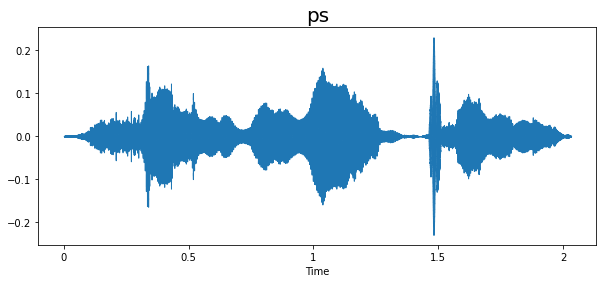

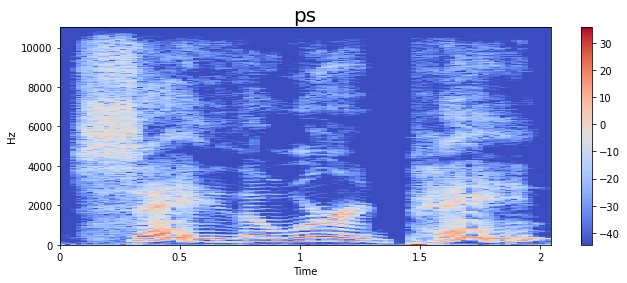

In [ ]:
emotion='ps'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


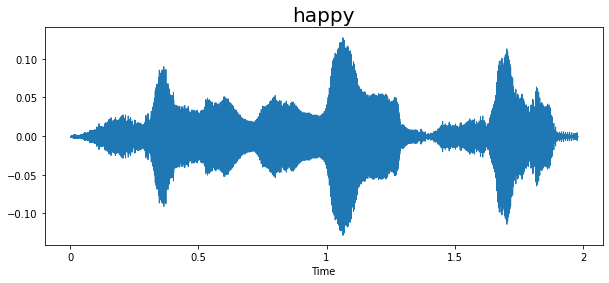

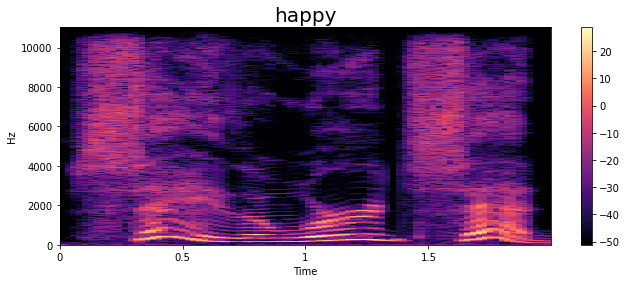

In [ ]:
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

**Feature Extraction**

In [ ]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-442.9476    ,  102.64698   ,    3.2276385 ,   38.04866   ,
         -2.9912841 ,   -0.7210301 ,   -7.886346  ,  -20.697845  ,
        -10.5895605 ,  -11.8154545 ,   -6.644551  ,    0.63863075,
        -16.15749   ,    1.841841  ,   -6.6075807 ,   -3.4132593 ,
          2.6519692 ,   -8.883036  ,   -7.7323437 ,   -0.84409416,
         -5.9303517 ,    1.8717343 ,   -6.202636  ,    1.5027119 ,
         -1.2139943 ,   -2.9033575 ,   -3.8223147 ,    2.7994294 ,
         -4.4310527 ,    3.937476  ,   -4.988764  ,    3.6297495 ,
         -0.80352837,    0.80873317,    3.6936262 ,    2.9990048 ,
          4.538136  ,    4.0331864 ,    4.7212534 ,    5.4428473 ],
      dtype=float32)

In [ ]:
x_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))

In [ ]:
x_mfcc

0     [-442.9476, 102.64698, 3.2276385, 38.04866, -2...
1     [-419.0024, 101.478645, 9.8400755, 8.33921, 9....
2     [-431.2836, 111.42815, 15.081932, -14.575138, ...
3     [-429.75397, 60.592484, 0.7589893, -8.926606, ...
4     [-534.04346, 123.958755, 38.95147, 5.334973, 2...
5     [-505.16003, 97.04418, 14.378593, -2.3896883, ...
6     [-488.8399, 118.07757, 29.963863, 18.320562, -...
7     [-321.17642, 48.39185, -20.058733, 14.34687, -...
8     [-382.33093, 74.90865, 35.28465, 25.932137, -3...
9     [-425.56723, 82.193756, 9.563856, -11.522142, ...
10    [-350.416, 89.05234, -13.038918, 1.8581958, -1...
11    [-412.31778, 82.81236, -2.6577315, -24.533663,...
12    [-334.64203, 55.17283, 1.5792089, 4.334319, -2...
13    [-282.36276, 61.083637, -43.3007, 14.999197, -...
Name: speech, dtype: object

In [ ]:
X=[x for x in x_mfcc]
X=np.array(X)
X.shape

(14, 40)

In [ ]:
x=np.expand_dims(X,-1)
x.shape

(14, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [ ]:

y=y.toarray()

In [ ]:
y.shape

(14, 7)

**Create LSTM Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model=Sequential([
              LSTM(28,return_sequences=False,input_shape=(40,1)),
              Dense(64,activation='relu'),
              Dropout(0.2),
              Dense(32,activation='relu'),
              Dropout(0.2),
              Dense(7,activation='softmax')
              ])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


              


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28)                3360      
                                                                 
 dense (Dense)               (None, 64)                1856      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 7,527
Trainable params: 7,527
Non-trainabl

**Train the model**

In [ ]:
history=model.fit(x,y,validation_split=0.2,epochs=100,batch_size=64,shuffle=True)

Epoch 1/100
1/1 [==============================] - 0s 79ms/step - loss: 0.4174 - accuracy: 0.8182 - val_loss: 4.2585 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 45ms/step - loss: 0.3450 - accuracy: 0.8182 - val_loss: 4.3292 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 42ms/step - loss: 0.2584 - accuracy: 0.9091 - val_loss: 4.3787 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 44ms/step - loss: 0.2056 - accuracy: 1.0000 - val_loss: 4.4327 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 44ms/step - loss: 0.2679 - accuracy: 0.9091 - val_loss: 4.4506 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 0.2642 - accuracy: 0.8182 - val_loss: 4.4132 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 0.2163 - accuracy: 0.9091 - val_loss: 4.3307 - val_accuracy: 0.0

**Plot the results**

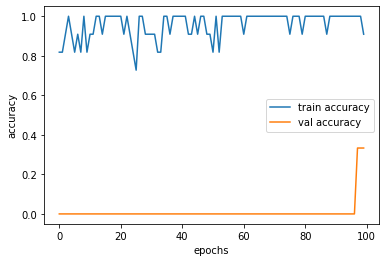

In [ ]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

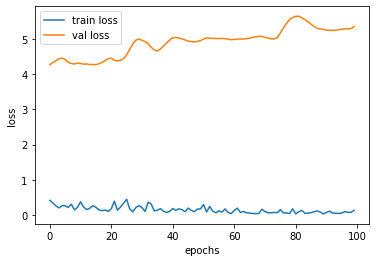

In [ ]:
epochs=list(range(100))
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()